In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score
import pickle
from  tensorflow.keras.layers import Flatten, Dense
import warnings;
warnings.simplefilter('ignore')

In [2]:
df= pd.read_csv('Signal.csv')

In [3]:
df.sample(10)

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
101,7.8,0.50,0.30,1.9,0.075,8.0,22.0,0.99590,3.31,0.56,10.4,6
1071,7.5,0.77,0.20,8.1,0.098,30.0,92.0,0.99892,3.20,0.58,9.2,5
922,8.4,0.62,0.12,1.8,0.072,38.0,46.0,0.99504,3.38,0.89,11.8,6
406,9.8,0.44,0.47,2.5,0.063,9.0,28.0,0.99810,3.24,0.65,10.8,6
1223,10.5,0.36,0.47,2.2,0.074,9.0,23.0,0.99638,3.23,0.76,12.0,6
1247,7.4,0.55,0.19,1.8,0.082,15.0,34.0,0.99655,3.49,0.68,10.5,5
158,7.1,0.68,0.00,2.2,0.073,12.0,22.0,0.99690,3.48,0.50,9.3,5
921,8.4,0.36,0.32,2.2,0.081,32.0,79.0,0.99640,3.30,0.72,11.0,6
970,10.4,0.26,0.48,1.9,0.066,6.0,10.0,0.99724,3.33,0.87,10.9,6
1339,7.5,0.51,0.02,1.7,0.084,13.0,31.0,0.99538,3.36,0.54,10.5,6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.shape

(1599, 12)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Parameter 1,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
Parameter 2,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
Parameter 3,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
Parameter 4,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
Parameter 5,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
Parameter 6,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
Parameter 7,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
Parameter 8,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
Parameter 9,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
Parameter 10,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [7]:
df.skew()

Parameter 1        0.982751
Parameter 2        0.671593
Parameter 3        0.318337
Parameter 4        4.540655
Parameter 5        5.680347
Parameter 6        1.250567
Parameter 7        1.515531
Parameter 8        0.071288
Parameter 9        0.193683
Parameter 10       2.428672
Parameter 11       0.860829
Signal_Strength    0.217802
dtype: float64

From the above data it can be inferred that Parameter 4, Parameter 5 has maximum number of outliers and the data is highly right skewed

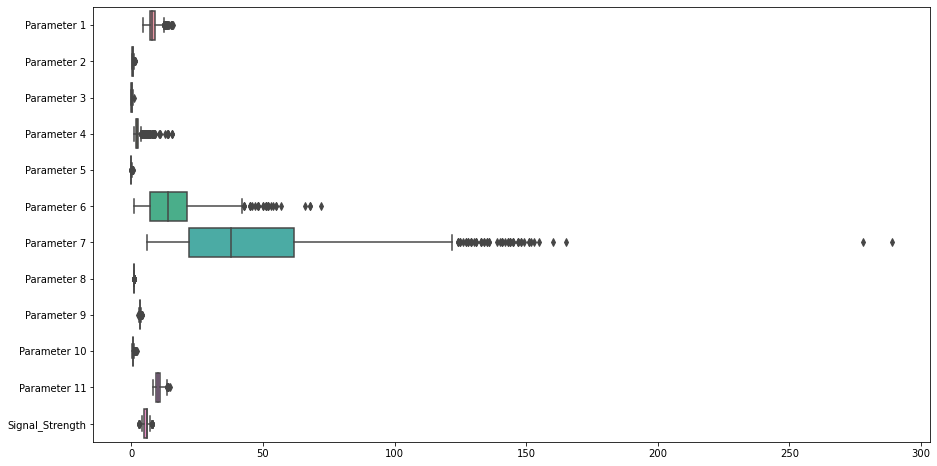

In [8]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df, orient="h")

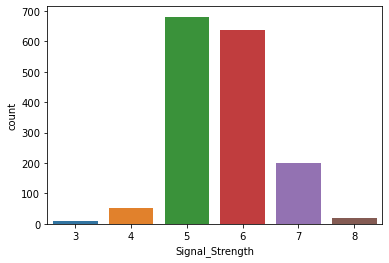

In [9]:
sns.countplot(df['Signal_Strength'])    # Distibution of the column 'Signal_Strength'
plt.show()

3,4,5,6,7,8 are the only value present in the dataset with maximum data has value as 5 

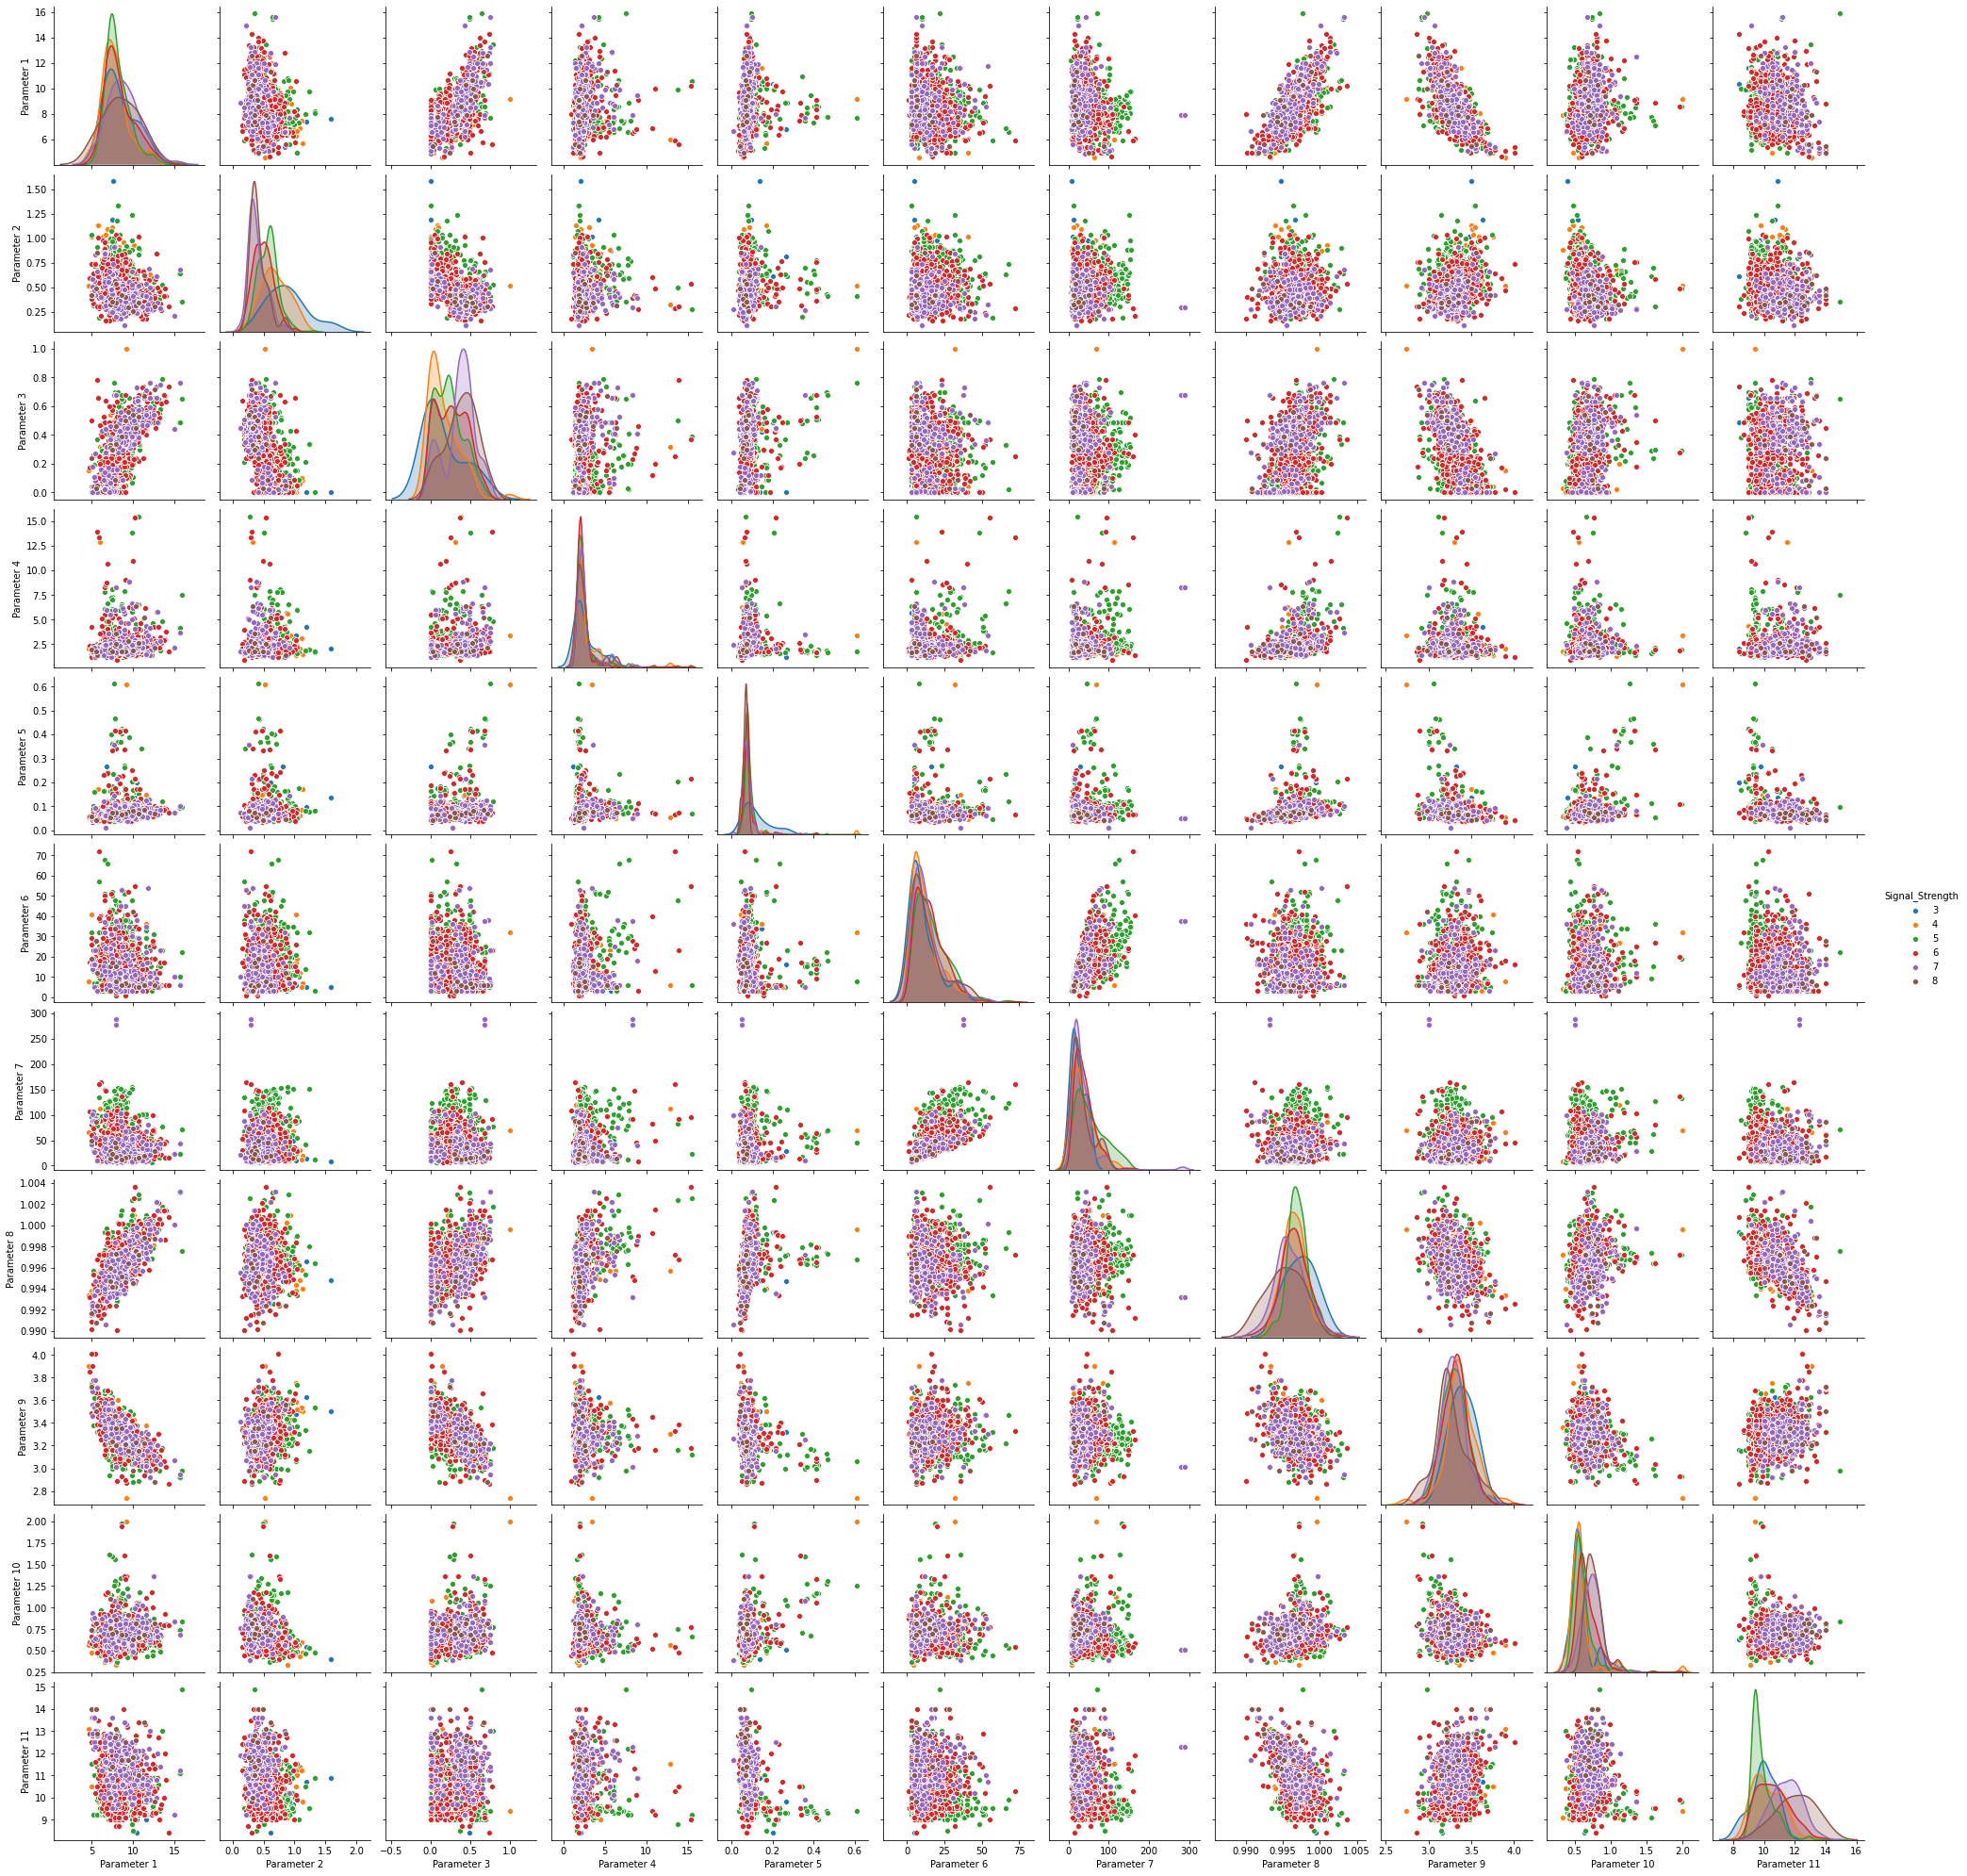

In [10]:
sns.pairplot(df,diag_kind='kde', hue='Signal_Strength')
plt.show()

In [11]:
x=df.drop(['Signal_Strength'],axis=1)
y=df['Signal_Strength']

In [12]:
x.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.25, random_state=42)

In [14]:
#Removing the outliers
from pandas import DataFrame
from sklearn.preprocessing import PowerTransformer
clmn=x_train.columns
pt = PowerTransformer()
x_train = pt.fit_transform(x_train)
x_train = DataFrame(x_train)
x_train.columns=clmn

In [15]:
#Removing the outliers
from pandas import DataFrame
from sklearn.preprocessing import PowerTransformer
clmn=x_test.columns
pt = PowerTransformer()
x_test = pt.fit_transform(x_test)
x_test = DataFrame(x_test)
x_test.columns=clmn

In [16]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

X_train= sc.fit_transform(x_train)
X_test=sc.transform(x_test)

In [17]:
y_train = y_train.to_numpy()
y_test=y_test.to_numpy()

In [18]:
# Initialize Sequential model
model_reg = tf.keras.Sequential()

# Normalize input data
model_reg.add(tf.keras.layers.BatchNormalization(input_shape=(11,)))
model_reg.add(tf.keras.layers.Dense(300, activation= "relu"))
model_reg.add(tf.keras.layers.Dense(121, activation= "relu"))
model_reg.add(tf.keras.layers.Dropout(0.25))
# Add final Dense layer for prediction
model_reg.add(tf.keras.layers.Dense(1))

In [19]:
model_reg.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 11)                44        
_________________________________________________________________
dense (Dense)                (None, 300)               3600      
_________________________________________________________________
dense_1 (Dense)              (None, 121)               36421     
_________________________________________________________________
dropout (Dropout)            (None, 121)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 122       
Total params: 40,187
Trainable params: 40,165
Non-trainable params: 22
_________________________________________________________________


In [20]:
model_reg.compile(optimizer='adam', loss='mse',metrics=['mae'])

In [21]:
model_reg.fit(X_train, y_train, validation_data=(X_test,y_test),epochs=50, batch_size=10)

Epoch 1/50
120/120 [==============================] - 1s 5ms/step - loss: 4.6626 - mae: 1.6292 - val_loss: 1.8803 - val_mae: 1.1106
Epoch 2/50
120/120 [==============================] - 0s 2ms/step - loss: 1.6284 - mae: 1.0120 - val_loss: 1.2801 - val_mae: 0.9119
Epoch 3/50
120/120 [==============================] - 0s 2ms/step - loss: 1.2630 - mae: 0.8936 - val_loss: 0.8758 - val_mae: 0.7622
Epoch 4/50
120/120 [==============================] - 0s 2ms/step - loss: 1.0384 - mae: 0.7940 - val_loss: 0.6786 - val_mae: 0.6477
Epoch 5/50
120/120 [==============================] - 0s 2ms/step - loss: 0.7929 - mae: 0.6897 - val_loss: 0.5395 - val_mae: 0.5914
Epoch 6/50
120/120 [==============================] - 0s 2ms/step - loss: 0.8153 - mae: 0.7052 - val_loss: 0.5799 - val_mae: 0.5879
Epoch 7/50
120/120 [==============================] - 0s 2ms/step - loss: 0.7739 - mae: 0.6924 - val_loss: 0.5175 - val_mae: 0.5803
Epoch 8/50
120/120 [==============================] - 0s 2ms/step - loss: 0.

In [22]:
results=model_reg.evaluate(X_test,y_test, batch_size=10)
print(results)

40/40 [==============================] - 0s 947us/step - loss: 0.4310 - mae: 0.5296
[0.4309777021408081, 0.5295846462249756]


In [23]:
y_pred = model_reg.predict(X_test)
print(y_pred[0])
print(y_pred[1])
print(y_pred[2])
print(y_pred[3])
print(y_pred[4])

[5.895435]
[5.4823947]
[5.8290615]
[5.6328087]
[6.0152693]


In [24]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print(score)

0.30329446738551324


In [25]:
# save the model
model_reg.save("signal_strength_quality_regressormodel.h5") #using h5 extension

In [26]:
# load the model
from tensorflow.keras.models import load_model
model_rr = load_model('signal_strength_quality_regressormodel.h5')

In [27]:
y_pred = model_rr.predict(X_test)

In [28]:
print(y_pred[0])
print(y_pred[1])
print(y_pred[2])
print(y_pred[3])
print(y_pred[4])

[5.895435]
[5.4823947]
[5.8290615]
[5.6328087]
[6.0152693]


In [29]:
score_r = r2_score(y_test,y_pred)
print(score_r)

0.30329446738551324


--------------------------------------------------------

Part 2

In [30]:
df['Signal_Strength'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: Signal_Strength, dtype: int64

In [31]:
# splitting data for test of categorial 
Xc_train, Xc_test, yc_train, yc_test = train_test_split(x, y, test_size=.30, random_state=42)

In [32]:
from tensorflow.keras.utils import to_categorical
yc_train_oh = to_categorical(yc_train, num_classes= 10)
yc_test_oh = to_categorical(yc_test, num_classes= 10)

In [33]:
#Removing the outliers
from pandas import DataFrame
from sklearn.preprocessing import PowerTransformer
clmn=Xc_train.columns
pt = PowerTransformer()
Xc_train = pt.fit_transform(Xc_train)
Xc_train = DataFrame(Xc_train)
Xc_train.columns=clmn

#Removing the outliers
from pandas import DataFrame
from sklearn.preprocessing import PowerTransformer
clmn=Xc_test.columns
pt = PowerTransformer()
Xc_test = pt.fit_transform(Xc_test)
Xc_test = DataFrame(Xc_test)
Xc_test.columns=clmn

In [34]:
# Standard Scalar
sc=StandardScaler()

Xnew_train= sc.fit_transform(Xc_train)
Xnew_test=sc.transform(Xc_test)


In [35]:
model_class = tf.keras.models.Sequential()

model_class.add(tf.keras.layers.BatchNormalization())
model_class.add(tf.keras.layers.Dense(400, activation='relu'))
model_class.add(tf.keras.layers.Dense(150, activation='relu'))
model_class.add(tf.keras.layers.Dropout(0.25))
model_class.add(tf.keras.layers.Dense(10, activation='softmax'))

In [36]:
earlystopping= tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience= 2,restore_best_weights= True)

In [37]:
# Compile the model
model_class.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

In [38]:
# Fit the model
model_class.fit(x=Xc_train, y=yc_train_oh, validation_data=(Xc_test,yc_test_oh), epochs=50, batch_size=32, callbacks=earlystopping)

Epoch 1/50
35/35 [==============================] - 1s 8ms/step - loss: 1.3364 - accuracy: 0.5326 - val_loss: 1.0574 - val_accuracy: 0.5562
Epoch 2/50
35/35 [==============================] - 0s 3ms/step - loss: 1.0557 - accuracy: 0.5862 - val_loss: 1.0031 - val_accuracy: 0.5417
Epoch 3/50
35/35 [==============================] - 0s 3ms/step - loss: 0.9922 - accuracy: 0.6023 - val_loss: 0.9840 - val_accuracy: 0.5500
Epoch 4/50
35/35 [==============================] - 0s 3ms/step - loss: 0.9788 - accuracy: 0.6014 - val_loss: 0.9521 - val_accuracy: 0.5688
Epoch 5/50
35/35 [==============================] - 0s 3ms/step - loss: 0.9418 - accuracy: 0.6363 - val_loss: 0.9426 - val_accuracy: 0.5813
Epoch 6/50
35/35 [==============================] - 0s 3ms/step - loss: 0.9168 - accuracy: 0.6247 - val_loss: 0.9381 - val_accuracy: 0.5688
Epoch 7/50
35/35 [==============================] - 0s 3ms/step - loss: 0.9088 - accuracy: 0.6336 - val_loss: 0.9271 - val_accuracy: 0.5750
Epoch 8/50
35/35 [==

In [39]:
model_class.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 11)                44        
_________________________________________________________________
dense_3 (Dense)              (None, 400)               4800      
_________________________________________________________________
dense_4 (Dense)              (None, 150)               60150     
_________________________________________________________________
dropout_1 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1510      
Total params: 66,504
Trainable params: 66,482
Non-trainable params: 22
_________________________________________________________________


In [40]:
y_pred= model_class.predict(Xc_test)
y_pred.shape

(480, 10)

In [41]:
y_pred = model_class.predict_classes(Xc_test)
y_pred

array([6, 5, 6, 5, 6, 5, 5, 5, 6, 6, 6, 5, 6, 5, 5, 6, 5, 5, 7, 5, 5, 5,
       6, 6, 5, 6, 6, 5, 5, 6, 5, 5, 6, 5, 6, 5, 6, 6, 5, 6, 5, 5, 6, 5,
       6, 6, 7, 6, 5, 6, 5, 5, 6, 7, 5, 5, 6, 5, 6, 5, 6, 6, 5, 5, 6, 5,
       7, 6, 6, 5, 6, 5, 6, 6, 6, 5, 7, 6, 6, 7, 6, 7, 5, 5, 6, 6, 5, 6,
       6, 5, 6, 5, 6, 6, 5, 6, 5, 6, 5, 6, 5, 5, 6, 6, 6, 6, 6, 5, 6, 5,
       6, 5, 6, 5, 6, 6, 6, 6, 5, 6, 6, 6, 6, 5, 6, 5, 7, 6, 6, 6, 6, 5,
       5, 6, 6, 5, 5, 5, 5, 6, 6, 6, 6, 5, 6, 5, 6, 5, 6, 5, 6, 6, 5, 6,
       6, 6, 6, 6, 5, 6, 6, 6, 6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6, 5, 7, 6,
       6, 5, 5, 5, 5, 7, 5, 7, 5, 6, 6, 6, 7, 5, 6, 6, 5, 6, 6, 5, 5, 5,
       5, 6, 6, 5, 5, 5, 7, 6, 5, 5, 6, 6, 6, 5, 6, 6, 6, 6, 6, 5, 6, 6,
       5, 7, 6, 6, 5, 5, 5, 7, 5, 6, 5, 5, 6, 6, 6, 6, 5, 6, 6, 5, 5, 5,
       6, 6, 6, 6, 6, 5, 6, 5, 6, 5, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 5, 6,
       6, 7, 5, 5, 6, 6, 5, 6, 5, 5, 5, 5, 6, 6, 7, 6, 7, 5, 5, 6, 6, 6,
       5, 6, 5, 6, 5, 7, 6, 5, 5, 6, 5, 6, 7, 6, 5,

In [42]:
model_class.save("signal_strength_quality_Classificationmodel.h5")

In [43]:
# load the model
from tensorflow.keras.models import load_model
model_c = load_model('signal_strength_quality_Classificationmodel.h5')

In [44]:
y_pred = model_c.predict_classes(Xc_test)
y_pred

array([6, 5, 6, 5, 6, 5, 5, 5, 6, 6, 6, 5, 6, 5, 5, 6, 5, 5, 7, 5, 5, 5,
       6, 6, 5, 6, 6, 5, 5, 6, 5, 5, 6, 5, 6, 5, 6, 6, 5, 6, 5, 5, 6, 5,
       6, 6, 7, 6, 5, 6, 5, 5, 6, 7, 5, 5, 6, 5, 6, 5, 6, 6, 5, 5, 6, 5,
       7, 6, 6, 5, 6, 5, 6, 6, 6, 5, 7, 6, 6, 7, 6, 7, 5, 5, 6, 6, 5, 6,
       6, 5, 6, 5, 6, 6, 5, 6, 5, 6, 5, 6, 5, 5, 6, 6, 6, 6, 6, 5, 6, 5,
       6, 5, 6, 5, 6, 6, 6, 6, 5, 6, 6, 6, 6, 5, 6, 5, 7, 6, 6, 6, 6, 5,
       5, 6, 6, 5, 5, 5, 5, 6, 6, 6, 6, 5, 6, 5, 6, 5, 6, 5, 6, 6, 5, 6,
       6, 6, 6, 6, 5, 6, 6, 6, 6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6, 5, 7, 6,
       6, 5, 5, 5, 5, 7, 5, 7, 5, 6, 6, 6, 7, 5, 6, 6, 5, 6, 6, 5, 5, 5,
       5, 6, 6, 5, 5, 5, 7, 6, 5, 5, 6, 6, 6, 5, 6, 6, 6, 6, 6, 5, 6, 6,
       5, 7, 6, 6, 5, 5, 5, 7, 5, 6, 5, 5, 6, 6, 6, 6, 5, 6, 6, 5, 5, 5,
       6, 6, 6, 6, 6, 5, 6, 5, 6, 5, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 5, 6,
       6, 7, 5, 5, 6, 6, 5, 6, 5, 5, 5, 5, 6, 6, 7, 6, 7, 5, 5, 6, 6, 6,
       5, 6, 5, 6, 5, 7, 6, 5, 5, 6, 5, 6, 7, 6, 5,

In [45]:
from sklearn.metrics import confusion_matrix
confusion_matrix(yc_test,y_pred)

array([[  0,   0,   1,   0,   0,   0],
       [  0,   0,  11,   6,   0,   0],
       [  0,   0, 139,  54,   2,   0],
       [  0,   0,  53, 137,  10,   0],
       [  0,   0,   2,  42,  17,   0],
       [  0,   0,   0,   3,   3,   0]], dtype=int64)